In [1]:
import matplotlib.pyplot as plt
import numpy as np

##### FUNZIONE DI AUTOCORRELAZIONE #####

def ACF(x, tn):
    ac = np.zeros(tn)
    tmax = x.size
    for t in range(tn):
        ac[t] = (np.sum(x[0:tmax-t]*x[t:])/(tmax-t) - (np.sum(x[0:tmax - t])*np.sum(x[t:]))/(tmax-t)**2)/(np.sum(x*x)/tmax - (np.sum(x)/tmax)**2)
    return ac

# FASE SOLIDA

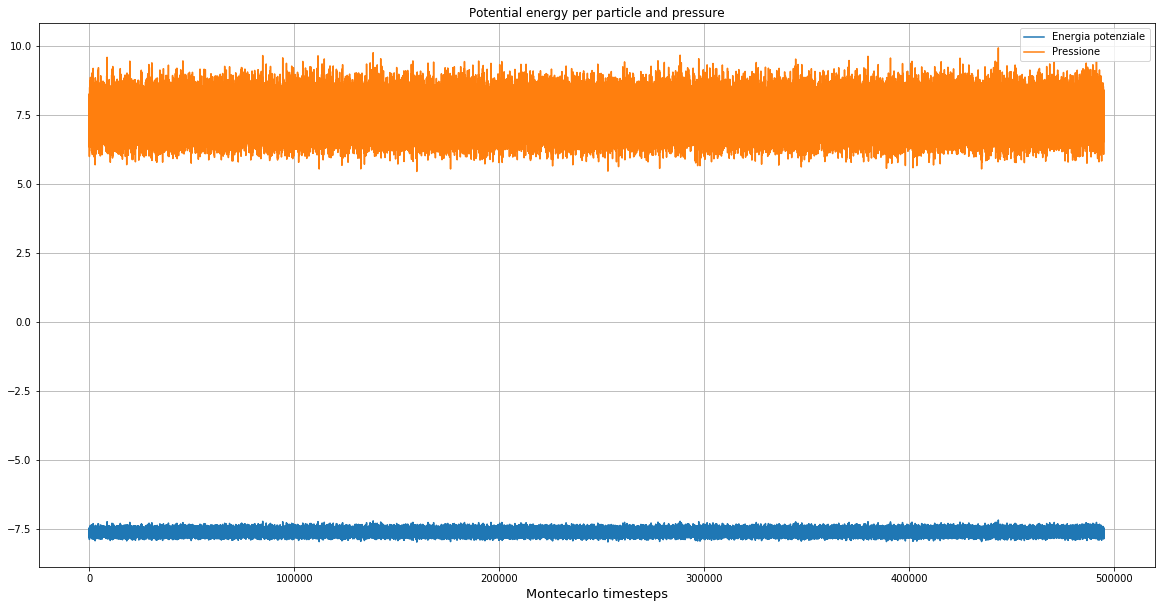

In [2]:
z = np.loadtxt("output_ene_solid.dat", unpack='true')
p = np.loadtxt("output_pres_solid.dat", unpack='true')
T = z.size
x1 = np.arange(T)


plt.figure(figsize=(20,10))
plt.plot(x1, z)
plt.plot(x1, p)

plt.legend(["Energia potenziale", "Pressione"], loc ="best")

plt.title('Potential energy per particle and pressure')
plt.xlabel('Montecarlo timesteps', fontsize=13)
plt.grid(True)


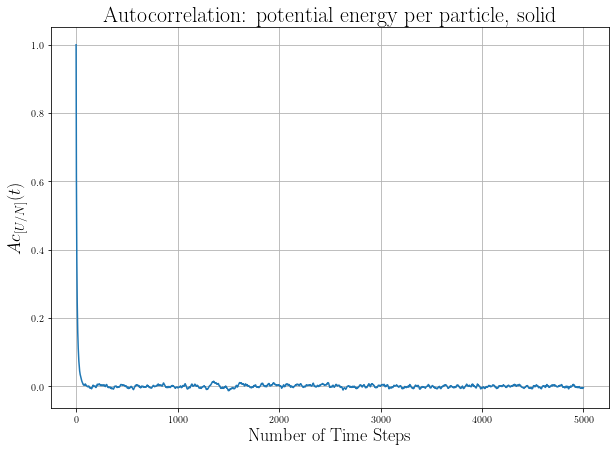

In [5]:
x = np.arange(5000)
plt.rc('text', usetex=True)
plt.rc('font', family='arial')
plt.figure(figsize=(10,7))
plt.plot(x, ACF(z, 5000))
plt.title('Autocorrelation: potential energy per particle, solid', fontsize=22)
plt.xlabel('Number of Time Steps', fontsize=18)
plt.ylabel('$Ac_{[U/N]}(t)$', fontsize=18)
plt.grid(True)
plt.show()

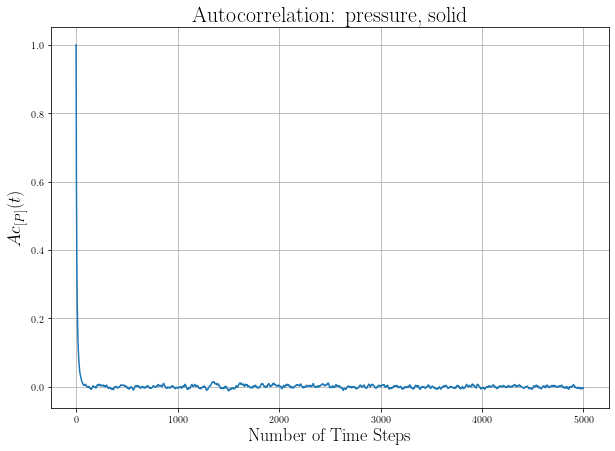

In [27]:
x = np.arange(5000)
plt.rc('text', usetex=True)
plt.rc('font', family='arial')
plt.figure(figsize=(10,7))
plt.plot(x, ACF(z, 5000))
plt.title('Autocorrelation: pressure, solid', fontsize=22)
plt.xlabel('Number of Time Steps', fontsize=18)
plt.ylabel('$Ac_{[P]}(t)$', fontsize=18)
plt.grid(True)
plt.show()

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
2000
2020
2040
2060
2080
2100
2120
2140
2160
2180
2200
2220
2240
2260
2280
2300
2320
2340
2360
2380
2400
2420
2440
2460
2480
2500
2520
2540
2560
2580
2600
2620
2640
2660
2680
2700
2720
2740
2760
2780
2800
2820
2840
2860
2880
2900
2920
2940
2960
2980
3000
3020
3040
3060
3080
3100
3120
3140
3160
3180
3200
3220
3240
3260
3280
3300
3320
3340
3360
3380
3400
3420
3440
3460
3480
3500
3520
3540
3560
3580
3600
3620
3640
3660
3680
3700
3720
3740
3760
3780
3800
3820
3840
3860
3880
3900
3920
3940
3960
3980
4000
4020
4040
4060
4080
4100
4120
4140
4160
4180
4200
422

ValueError: x and y must have same first dimension, but have shapes (24,) and (250,)

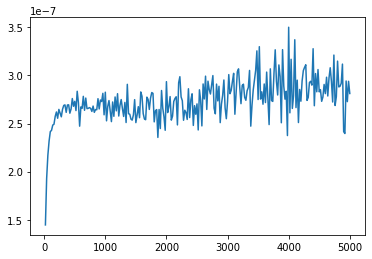

In [6]:
import math

M_step = T #numero lanci montecarlo

err_u = np.array([])
err_p = np.array([])

def error(ave, ave_2, N):
    return (1/(N-1) * (ave_2 - ave**2))

L = np.arange(20, 5001, 20) # Block Length

for l in L: #ciclo sulla lunghezza dei blocchi
    print(l)
    N_block = int(M_step/l)
    prog_u = 0.
    prog_2_u = 0.
    prog_p = 0.
    prog_2_p = 0.
    for i in range(N_block): #ciclo sui blocchi, entro nel blocco i
        somma_u = 0.
        somma_p = 0.
        for j in range(0, l): #riempio le somme per le medie di blocco
            somma_u += z[i*l + j]
            somma_p += p[i*l + j]
            
        ave_u = somma_u/l #medie di blocco
        ave_p = somma_p/l
    
        prog_u += ave_u
        prog_2_u += ave_u*ave_u
        prog_p += ave_p
        prog_2_p += ave_p*ave_p
        
    err_u = np.append(err_u, error(prog_u/N_block, prog_2_u/N_block, N_block))
    err_p = np.append(err_p, error(prog_p/N_block, prog_2_p/N_block, N_block))
        

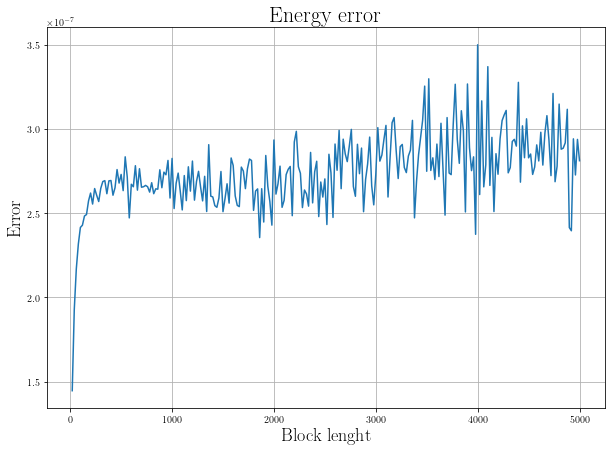

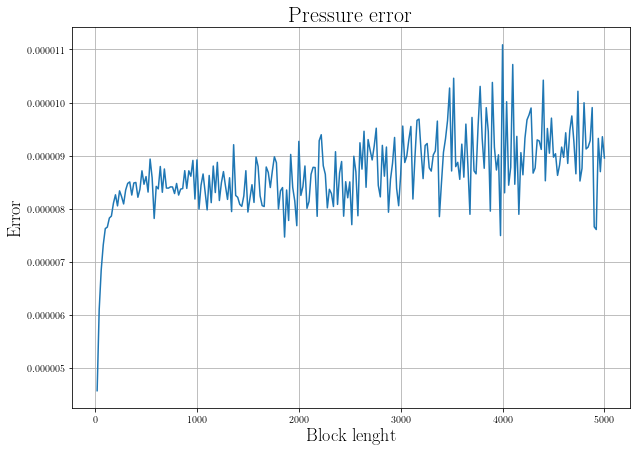

In [7]:
plt.rc('text', usetex=True)
plt.rc('font', family='arial')
plt.figure(figsize=(10,7))
plt.plot(L, err_u)
plt.title('Energy error', fontsize=22)
plt.xlabel('Block lenght', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.grid(True)

plt.figure(figsize=(10,7))
plt.plot(L, err_p)
plt.title('Pressure error', fontsize=22)
plt.xlabel('Block lenght', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.grid(True)

plt.show()

# FASE LIQUIDA

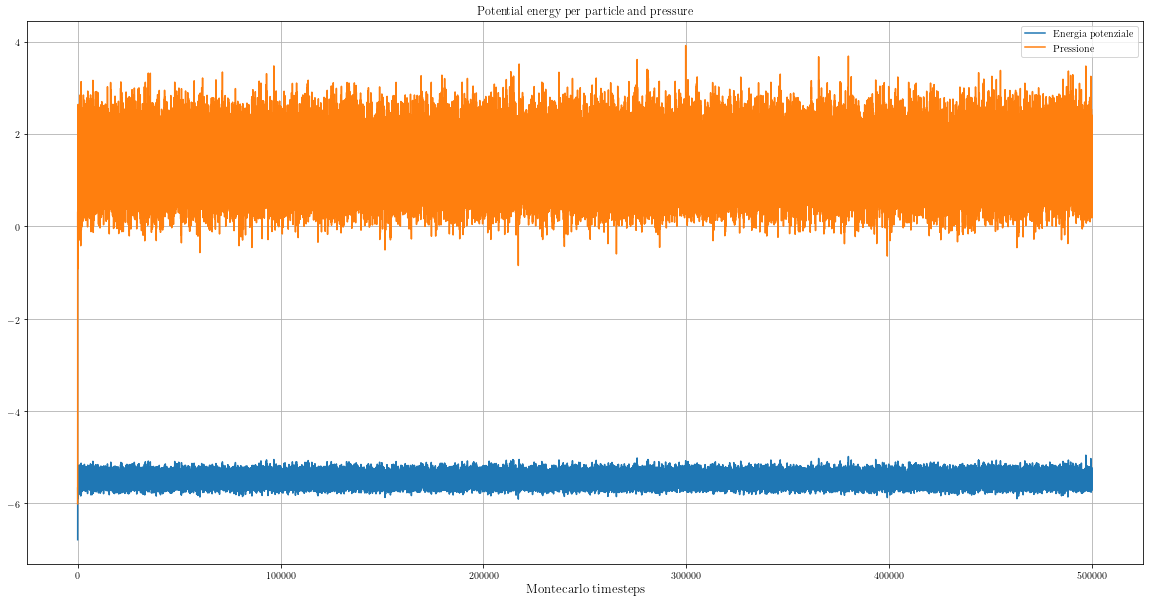

In [6]:
z = np.loadtxt("output_ene_liquid.dat", unpack='true')
p = np.loadtxt("output_pres_liquid.dat", unpack='true')
T = z.size
x1 = np.arange(T)

plt.figure(figsize=(20,10))
plt.plot(x1, z)
plt.plot(x1, p)

plt.legend(["Energia potenziale", "Pressione"], loc ="best")

plt.title('Potential energy per particle and pressure')
plt.xlabel('Montecarlo timesteps', fontsize=13)
plt.grid(True)

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
2000
2020
2040
2060
2080
2100
2120
2140
2160
2180
2200
2220
2240
2260
2280
2300
2320
2340
2360
2380
2400
2420
2440
2460
2480
2500
2520
2540
2560
2580
2600
2620
2640
2660
2680
2700
2720
2740
2760
2780
2800
2820
2840
2860
2880
2900
2920
2940
2960
2980
3000
3020
3040
3060
3080
3100
3120
3140
3160
3180
3200
3220
3240
3260
3280
3300
3320
3340
3360
3380
3400
3420
3440
3460
3480
3500
3520
3540
3560
3580
3600
3620
3640
3660
3680
3700
3720
3740
3760
3780
3800
3820
3840
3860
3880
3900
3920
3940
3960
3980
4000
4020
4040
4060
4080
4100
4120
4140
4160
4180
4200
422

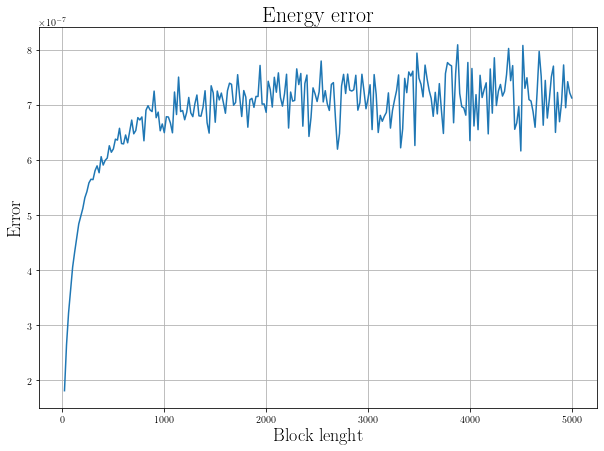

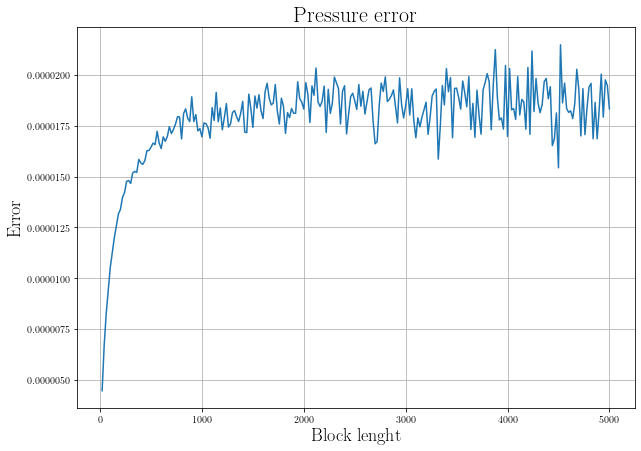

In [15]:
import math

M_step = T #numero lanci montecarlo

err_u = np.array([])
err_p = np.array([])

def error(ave, ave_2, N):
    return (1/(N-1) * (ave_2 - ave**2))

L = np.arange(20, 5001, 20) # Block Length

for l in L: #ciclo sulla lunghezza dei blocchi
    print(l)
    N_block = int(M_step/l)
    prog_u = 0.
    prog_2_u = 0.
    prog_p = 0.
    prog_2_p = 0.
    for i in range(N_block): #ciclo sui blocchi, entro nel blocco i
        somma_u = 0.
        somma_p = 0.
        for j in range(0, l): #riempio le somme per le medie di blocco
            somma_u += z[i*l + j]
            somma_p += p[i*l + j]
            
        ave_u = somma_u/l #medie di blocco
        ave_p = somma_p/l
    
        prog_u += ave_u
        prog_2_u += ave_u*ave_u
        prog_p += ave_p
        prog_2_p += ave_p*ave_p
        
    err_u = np.append(err_u, error(prog_u/N_block, prog_2_u/N_block, N_block))
    err_p = np.append(err_p, error(prog_p/N_block, prog_2_p/N_block, N_block))

plt.figure(figsize=(10,7))
plt.plot(L, err_u)
plt.title('Energy error', fontsize=22)
plt.xlabel('Block lenght', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.grid(True)

plt.figure(figsize=(10,7))
plt.plot(L, err_p)
plt.title('Pressure error', fontsize=22)
plt.xlabel('Block lenght', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.grid(True)

plt.show()

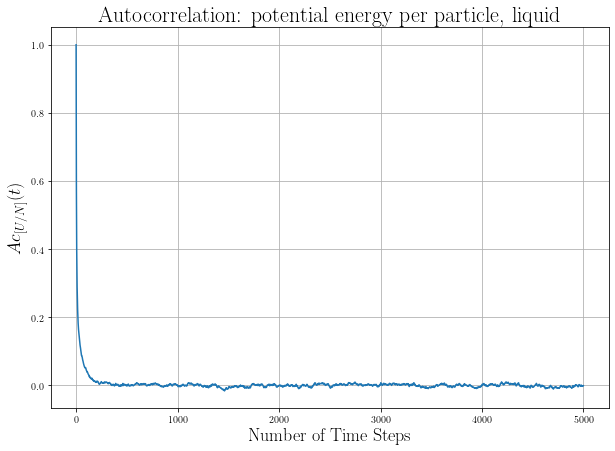

In [7]:
x = np.arange(5000)
plt.rc('text', usetex=True)
plt.rc('font', family='arial')
plt.figure(figsize=(10,7))
plt.plot(x, ACF(z, 5000))
plt.title('Autocorrelation: potential energy per particle, liquid', fontsize=22)
plt.xlabel('Number of Time Steps', fontsize=18)
plt.ylabel('$Ac_{[U/N]}(t)$', fontsize=18)
plt.grid(True)
plt.show()

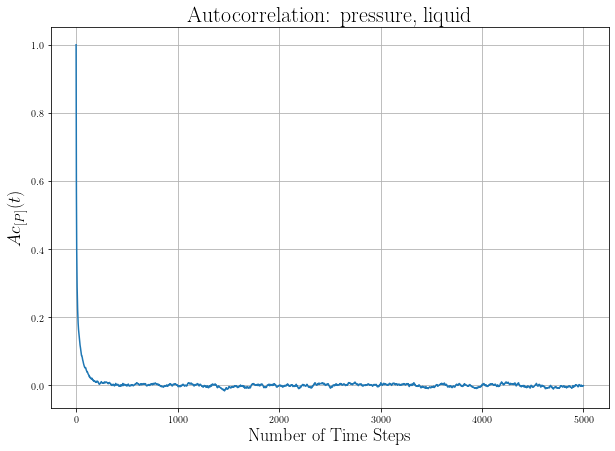

In [36]:
x = np.arange(5000)
plt.rc('text', usetex=True)
plt.rc('font', family='arial')
plt.figure(figsize=(10,7))
plt.plot(x, ACF(z, 5000))
plt.title('Autocorrelation: pressure, liquid', fontsize=22)
plt.xlabel('Number of Time Steps', fontsize=18)
plt.ylabel('$Ac_{[P]}(t)$', fontsize=18)
plt.grid(True)
plt.show()

# FASE GASSOSA

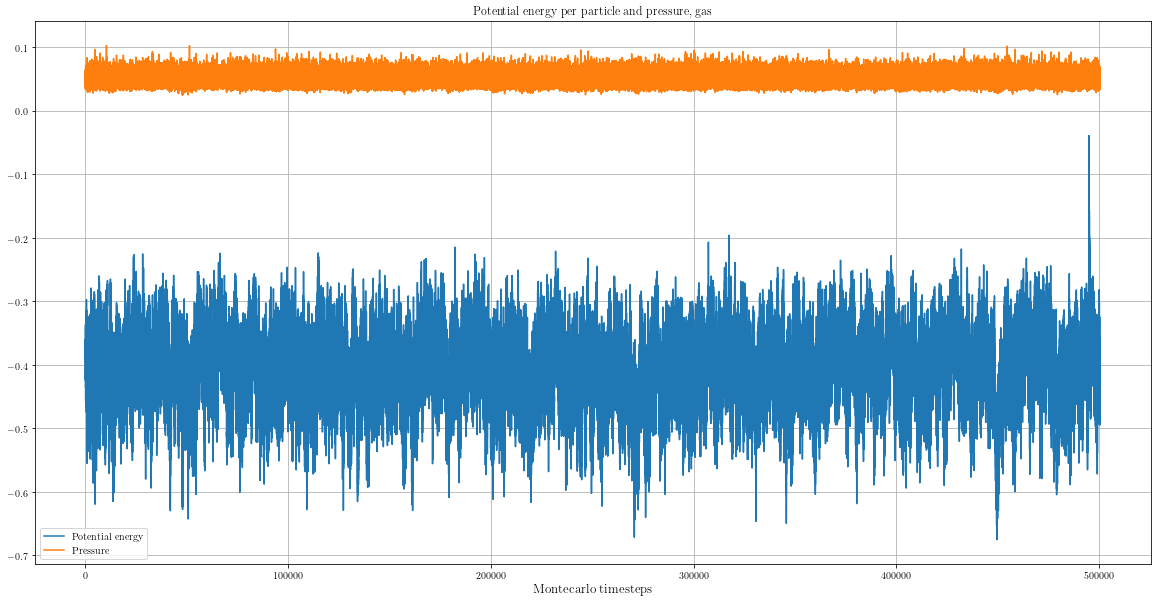

In [8]:
z = np.loadtxt("output_ene_gas.dat", unpack='true')
p = np.loadtxt("output_pres_gas.dat", unpack='true')
T = z.size
x1 = np.arange(T)

plt.figure(figsize=(20,10))
plt.plot(x1, z)
plt.plot(x1, p)

plt.legend(["Potential energy", "Pressure"], loc ="best")

plt.title('Potential energy per particle and pressure, gas')
plt.xlabel('Montecarlo timesteps', fontsize=13)
plt.grid(True)

20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
2000
2020
2040
2060
2080
2100
2120
2140
2160
2180
2200
2220
2240
2260
2280
2300
2320
2340
2360
2380
2400
2420
2440
2460
2480
2500
2520
2540
2560
2580
2600
2620
2640
2660
2680
2700
2720
2740
2760
2780
2800
2820
2840
2860
2880
2900
2920
2940
2960
2980
3000
3020
3040
3060
3080
3100
3120
3140
3160
3180
3200
3220
3240
3260
3280
3300
3320
3340
3360
3380
3400
3420
3440
3460
3480
3500
3520
3540
3560
3580
3600
3620
3640
3660
3680
3700
3720
3740
3760
3780
3800
3820
3840
3860
3880
3900
3920
3940
3960
3980
4000
4020
4040
4060
4080
4100
4120
4140
4160
4180
4200
422

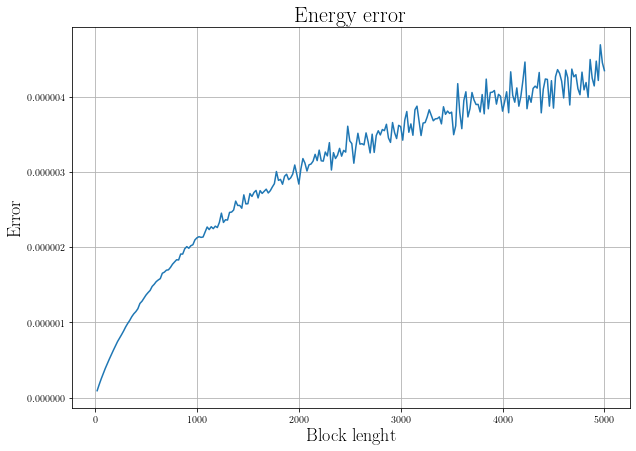

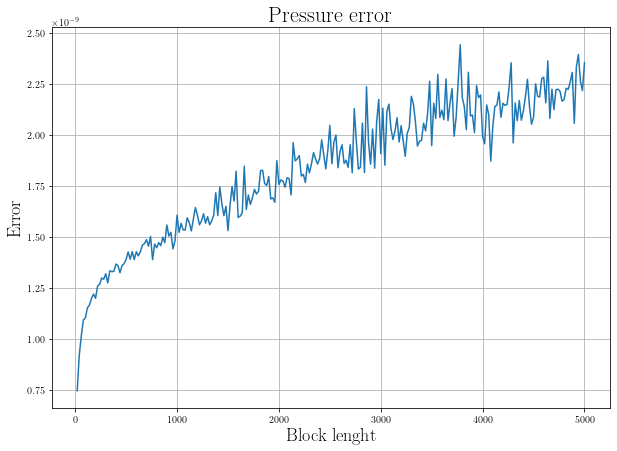

In [9]:
import math

M_step = T #numero lanci montecarlo

err_u = np.array([])
err_p = np.array([])

def error(ave, ave_2, N):
    return (1/(N-1) * (ave_2 - ave**2))

L = np.arange(20, 5001, 20) # Block Length

for l in L: #ciclo sulla lunghezza dei blocchi
    print(l)
    N_block = int(M_step/l)
    prog_u = 0.
    prog_2_u = 0.
    prog_p = 0.
    prog_2_p = 0.
    for i in range(N_block): #ciclo sui blocchi, entro nel blocco i
        somma_u = 0.
        somma_p = 0.
        for j in range(0, l): #riempio le somme per le medie di blocco
            somma_u += z[i*l + j]
            somma_p += p[i*l + j]
            
        ave_u = somma_u/l #medie di blocco
        ave_p = somma_p/l
    
        prog_u += ave_u
        prog_2_u += ave_u*ave_u
        prog_p += ave_p
        prog_2_p += ave_p*ave_p
        
    err_u = np.append(err_u, error(prog_u/N_block, prog_2_u/N_block, N_block))
    err_p = np.append(err_p, error(prog_p/N_block, prog_2_p/N_block, N_block))

plt.figure(figsize=(10,7))
plt.plot(L, err_u)
plt.title('Energy error', fontsize=22)
plt.xlabel('Block lenght', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.grid(True)

plt.figure(figsize=(10,7))
plt.plot(L, err_p)
plt.title('Pressure error', fontsize=22)
plt.xlabel('Block lenght', fontsize=18)
plt.ylabel('Error', fontsize=18)
plt.grid(True)

plt.show()

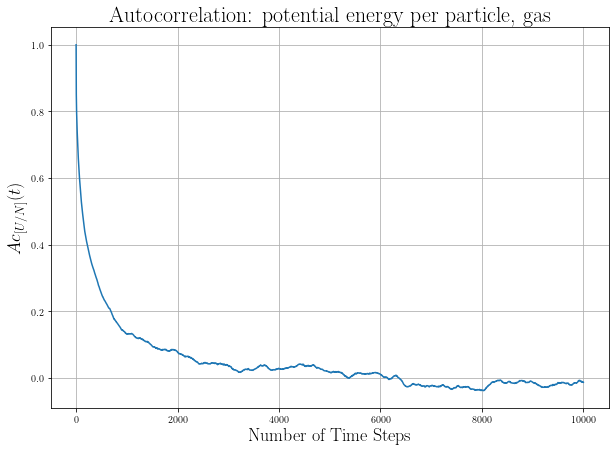

In [39]:
x = np.arange(10000)
plt.rc('text', usetex=True)
plt.rc('font', family='arial')
plt.figure(figsize=(10,7))
plt.plot(x, ACF(z, 10000))
plt.title('Autocorrelation: potential energy per particle, gas', fontsize=22)
plt.xlabel('Number of Time Steps', fontsize=18)
plt.ylabel('$Ac_{[U/N]}(t)$', fontsize=18)
plt.grid(True)
plt.show()

In [ ]:
x = np.arange(10000)
plt.rc('text', usetex=True)
plt.rc('font', family='arial')
plt.figure(figsize=(10,7))
plt.plot(x, ACF(z, 10000))
plt.title('Autocorrelation: pressure, gas', fontsize=22)
plt.xlabel('Number of Time Steps', fontsize=18)
plt.ylabel('$Ac_{[P]}(t)$', fontsize=18)
plt.grid(True)
plt.show()